(4, 4) (4, 1) (1, 4) (1, 1)
q = 
 [[-17.05833144  11.06809005  -8.15665538 -11.34630334   9.81996007]]
Coefficient bitwidths = 
 [[20. 18. 26. 27. 16.]]
accum[ 0 ] | 43.0 18.0
alpha[ 0 ] | 20.0 18.0
beta [ 0 ] | 20.0 18.0
k_ts [ 0 ] | 25.0 24.0
----------------------------------------
accum[ 1 ] | 25.0 0.0
alpha[ 1 ] | 18.0 0.0
beta [ 1 ] | 18.0 0.0
k_ts [ 1 ] | 10.0 9.0
----------------------------------------
accum[ 2 ] | 34.0 9.0
alpha[ 2 ] | 26.0 9.0
beta [ 2 ] | 26.0 9.0
k_ts [ 2 ] | 11.0 10.0
----------------------------------------
accum[ 3 ] | 37.0 12.0
alpha[ 3 ] | 27.0 12.0
beta [ 3 ] | 27.0 12.0
k_ts [ 3 ] | 15.0 14.0
----------------------------------------
accum[ 4 ] | 25.0 0.0
alpha[ 4 ] | 16.0 0.0
beta [ 4 ] | 16.0 0.0
k_ts [ 4 ] | 2.0 1.0
----------------------------------------
np.amin(ds_in) -0.5
np.amax(ds_in) 0.5


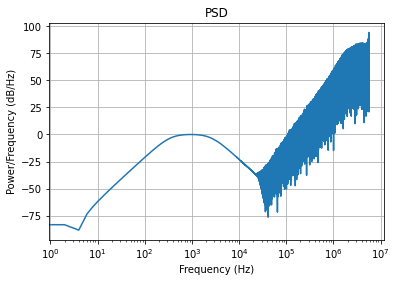

In [1]:
#
# Filter example - bessel bandpass
#
import numpy as np
from scipy import signal
import sys

if '../sdfpy' not in sys.path:
  sys.path.insert(0,'../sdfpy')

import sdfpy as sdf
import sd_sim

# ----------------------------------------------------------
# Filter Specifications
OSR = 256      # oversample ratio
fb  = 22050    # nyquist
fs  = OSR*2*fb # sampling frequency
ts  = 1/fs     # sampling period

# ----------------------------------------------------------
# Bandpass Filter - 300Hz to 3kHz
Wn = 2*np.pi*np.array([300, 3000])
ftype = 'bandpass'
N = 4

[z,p,k]   = signal.bessel(int(N/2),Wn,ftype, analog=True, output='zpk')
[A,B,C,D] = signal.zpk2ss(z,p,k)

print(A.shape, B.shape, C.shape, D.shape)

filter = sdf.sd_filter(OSR,fb)
filter.run(A,B,C,D)
sd_sim.sim_filter(filter)